In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [3]:
storage = {}
disp = [i*250 for i in range(len(timepoints))]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    chi_rad =  ul.interpnan(df["chi_rad"][idx1-20:idx2+20])
    chi_rad = chi_rad.loc[idx1:idx2].to_numpy() 
    storage[file] = chi_rad
storage = pd.DataFrame(storage)
storage.to_csv(r"D:\PPMI_UA_2021\Database\chi_rad.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


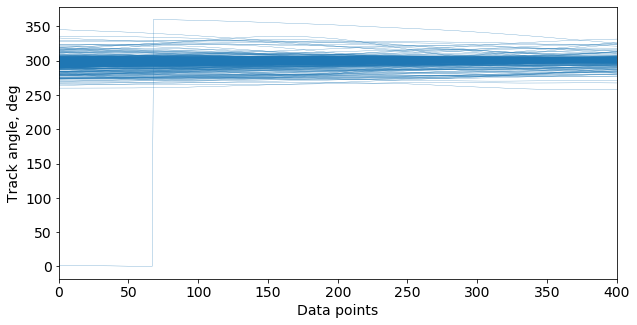

In [4]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\chi_rad.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot((df[file].to_numpy() * math.degrees(1)) % 360, '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Track angle, deg", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\chi_rad.png")

In [5]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\chi_rad.csv")
counter, sampling, duration = 0, 16, 5
up_bound, lw_bound = 305, 295
track_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    track_deg = (df[file].to_numpy() * math.degrees(1)) % 360
    for irow, _ in enumerate(track_deg):
        if irow >= track_deg.shape[0] - sampling * duration:
            track_flag.append(0)
            break
        else:
            flag_up = track_deg[irow:irow + sampling * duration] >= up_bound
            flag_lw = track_deg[irow:irow + sampling * duration] <= lw_bound
            if sum(flag_up) >= sampling * duration or sum(flag_lw) >= sampling * duration:
                track_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["track"] = track_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

   6 ... flight_10152 ... Unstable
   8 ... flight_10164 ... Unstable
  15 ... flight_10331 ... Unstable
  33 ... flight_10445 ... Unstable
  73 ... flight_11044 ... Unstable
  79 ... flight_11088 ... Unstable
  99 ... flight_11417 ... Unstable
 103 ... flight_11425 ... Unstable
 129 ... flight_11701 ... Unstable
 131 ... flight_11707 ... Unstable
 133 ... flight_11725 ... Unstable
 151 ... flight_12057 ... Unstable
 169 ... flight_12415 ... Unstable
 188 ... flight_12772 ... Unstable
 210 ... flight_13104 ... Unstable
 230 ... flight_13550 ... Unstable
 237 ... flight_13661 ... Unstable
 241 ... flight_13702 ... Unstable
 265 ... flight_14083 ... Unstable
 276 ... flight_14309 ... Unstable
 277 ... flight_14344 ... Unstable
 291 ... flight_14523 ... Unstable
 320 ... flight_14939 ... Unstable
 326 ... flight_15080 ... Unstable
 330 ... flight_15126 ... Unstable
 336 ... flight_15170 ... Unstable
 362 ... flight_15516 ... Unstable
 387 ... flight_15739 ... Unstable
 389 ... flight_1574

In [8]:
sop_criteria.to_csv("dbase/sop_criteria.csv", index=False)

In [6]:
sop_criteria.gamma.sum()

144

In [7]:
sop_criteria.track.sum()

115